In [50]:
import tensorflow as tf

In [51]:
tf.__version__

'2.13.0'

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [53]:
import pandas as pd

In [54]:
iris = pd.read_csv('./data/iris3.csv')

In [55]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [59]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [56]:
iris.columns.value_counts().sum()

5

In [57]:
X = iris.values[:, :4]
y = iris.values[:,4]
 

In [58]:
X.shape

(150, 4)

In [45]:
X.dtype

dtype('O')

In [46]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [69]:
X = X.astype('float')  

dtype('O')

In [ ]:
iris.values
iris.values[:,4]

In [64]:
iris.values[:,4]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [66]:
help(pd.get_dummies)


Help on function get_dummies in module pandas.core.reshape.encoding:

get_dummies(data, prefix=None, prefix_sep: 'str | Iterable[str] | dict[str, str]' = '_', dummy_na: 'bool' = False, columns=None, sparse: 'bool' = False, drop_first: 'bool' = False, dtype: 'NpDtype | None' = None) -> 'DataFrame'
    Convert categorical variable into dummy/indicator variables.
    
    Each variable is converted in as many 0/1 variables as there are different
    values. Columns in the output are each named after a value; if the input is
    a DataFrame, the name of the original variable is prepended to the value.
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a diction

In [68]:
# Iris-setosa, Iris-versicolor, Iris-virginica

y = pd.get_dummies(y)

print(y[0:5]) 
y.info()

   Iris-setosa  Iris-versicolor  Iris-virginica
0         True            False           False
1         True            False           False
2         True            False           False
3         True            False           False
4         True            False           False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Iris-setosa      150 non-null    bool 
 1   Iris-versicolor  150 non-null    bool 
 2   Iris-virginica   150 non-null    bool 
dtypes: bool(3)
memory usage: 578.0 bytes


In [163]:
iris2_species = pd.Series(iris['species'].values)
iris2_species.replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)
 
iris_label2d = iris2_species.values.reshape(150, -1)
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore') 

# print(iris_label2d)
y_encode2 = enc.fit_transform(iris_label2d)


In [164]:

iris2_species = pd.Series(iris['species'].values)
iris2_species.replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)
iris2_species_reshaped = iris2_species.values.reshape(-1, 1)


In [167]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore') 
val1 = [['Iris-setosa', 0], ['Iris-versicolor', 1], ['Iris-virginica', 2]]
enc.fit(iris2_species_reshaped)
transformed_iris2_species = enc.transform(iris2_species_reshaped).toarray()
# print(transformed_iris2_species) 

In [166]:
model3 = Sequential()
model3.add(Dense(12,
            input_dim = 4,
            activation = 'relu' 
))
model3.add(Dense(8,
            activation = 'relu'       
))
model3.add(Dense(3,
                activation='softmax'
))
model3.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=['accuracy']
)
model3.fit(X, transformed_iris2_species, epochs=50, batch_size=5)

Epoch 1/50
30/30 [==============================] - 0s 1ms/step - loss: 1.6901 - accuracy: 0.3333
Epoch 2/50
30/30 [==============================] - 0s 953us/step - loss: 1.1525 - accuracy: 0.1933
Epoch 3/50
30/30 [==============================] - 0s 849us/step - loss: 0.9239 - accuracy: 0.5267
Epoch 4/50
30/30 [==============================] - 0s 857us/step - loss: 0.8074 - accuracy: 0.6733
Epoch 5/50
30/30 [==============================] - 0s 833us/step - loss: 0.7172 - accuracy: 0.7133
Epoch 6/50
30/30 [==============================] - 0s 850us/step - loss: 0.6510 - accuracy: 0.6933
Epoch 7/50
30/30 [==============================] - 0s 846us/step - loss: 0.6010 - accuracy: 0.7867
Epoch 8/50
30/30 [==============================] - 0s 882us/step - loss: 0.5639 - accuracy: 0.7867
Epoch 9/50
30/30 [==============================] - 0s 887us/step - loss: 0.5330 - accuracy: 0.8067
Epoch 10/50
30/30 [==============================] - 0s 1ms/step - loss: 0.5021 - accuracy: 0.8600
Epo

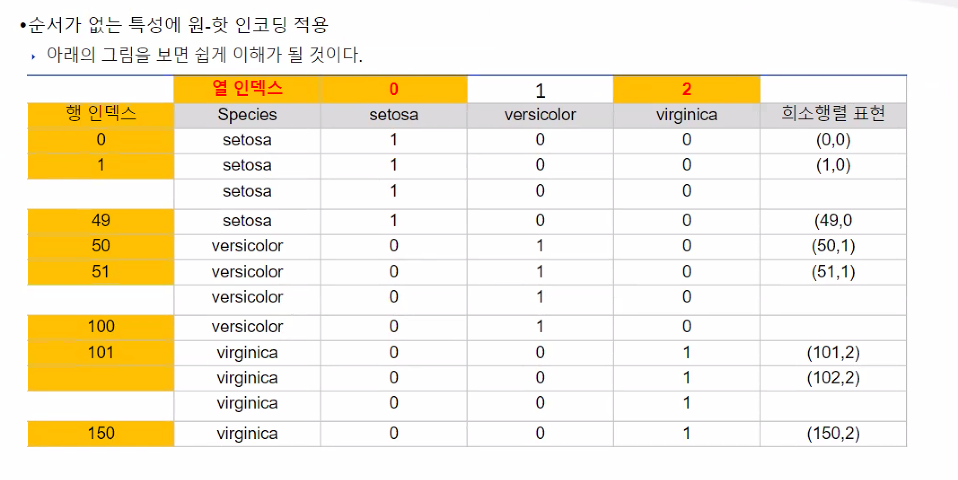

In [152]:
X=iris.iloc[:, :4]
y=iris.iloc[:, 4]
y_encode = pd.get_dummies(y)
y_encode

,0,1,2
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [153]:
model = Sequential()
model.add(Dense(12,
            input_dim = 4,
            activation = 'relu' 
))
model.add(Dense(8,
            activation = 'relu'       
))
model.add(Dense(3,
                activation='softmax'
))
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=['accuracy']
)
model.fit(X, y_encode, epochs=50, batch_size=5)

Epoch 1/50
30/30 [==============================] - 0s 1ms/step - loss: 1.2962 - accuracy: 0.3333
Epoch 2/50
30/30 [==============================] - 0s 1ms/step - loss: 1.1786 - accuracy: 0.3333
Epoch 3/50
30/30 [==============================] - 0s 1ms/step - loss: 1.1403 - accuracy: 0.3333
Epoch 4/50
30/30 [==============================] - 0s 897us/step - loss: 1.1178 - accuracy: 0.3333
Epoch 5/50
30/30 [==============================] - 0s 983us/step - loss: 1.1094 - accuracy: 0.3333
Epoch 6/50
30/30 [==============================] - 0s 897us/step - loss: 1.1039 - accuracy: 0.3533
Epoch 7/50
30/30 [==============================] - 0s 896us/step - loss: 1.1001 - accuracy: 0.3133
Epoch 8/50
30/30 [==============================] - 0s 1ms/step - loss: 1.0978 - accuracy: 0.3267
Epoch 9/50
30/30 [==============================] - 0s 967us/step - loss: 1.0959 - accuracy: 0.3200
Epoch 10/50
30/30 [==============================] - 0s 1ms/step - loss: 1.0945 - accuracy: 0.3267
Epoch 11/

In [145]:
model2 = Sequential()
model2.add(Dense(12,
            input_dim = 4,
            activation = 'relu' 
))
model2.add(Dense(8,
            activation = 'relu'       
))
model2.add(Dense(3,
                activation='softmax'
))
model2.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=['accuracy']
)
model2.fit(X, y_encode, epochs=50, batch_size=5)

Epoch 1/50
30/30 [==============================] - 0s 931us/step - loss: 1.4025 - accuracy: 0.0733
Epoch 2/50
30/30 [==============================] - 0s 868us/step - loss: 1.2524 - accuracy: 0.3333
Epoch 3/50
30/30 [==============================] - 0s 897us/step - loss: 1.1746 - accuracy: 0.3333
Epoch 4/50
30/30 [==============================] - 0s 931us/step - loss: 1.1136 - accuracy: 0.3067
Epoch 5/50
30/30 [==============================] - 0s 897us/step - loss: 1.0429 - accuracy: 0.3333
Epoch 6/50
30/30 [==============================] - 0s 900us/step - loss: 0.9862 - accuracy: 0.4067
Epoch 7/50
30/30 [==============================] - 0s 897us/step - loss: 0.9272 - accuracy: 0.6667
Epoch 8/50
30/30 [==============================] - 0s 897us/step - loss: 0.8706 - accuracy: 0.6267
Epoch 9/50
30/30 [==============================] - 0s 915us/step - loss: 0.8131 - accuracy: 0.6667
Epoch 10/50
30/30 [==============================] - 0s 896us/step - loss: 0.7675 - accuracy: 0.7400

In [146]:
X.iloc[0]

sepal_length    5.1
sepal_width     3.5
petal_length    1.4
petal_width     0.2
Name: 0, dtype: float64

In [147]:
X.iloc[0].values

array([5.1, 3.5, 1.4, 0.2])

In [148]:
# help(model2.predict)

In [149]:
 
model2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 12)                60        
                                                                 
 dense_37 (Dense)            (None, 8)                 104       
                                                                 
 dense_38 (Dense)            (None, 3)                 27        
                                                                 
Total params: 191 (764.00 Byte)
Trainable params: 191 (764.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [156]:
np.round(model2.predict(X.iloc[:1, :4]))

1/1 [==============================] - 0s 20ms/step


array([[1., 0., 0.]], dtype=float32)

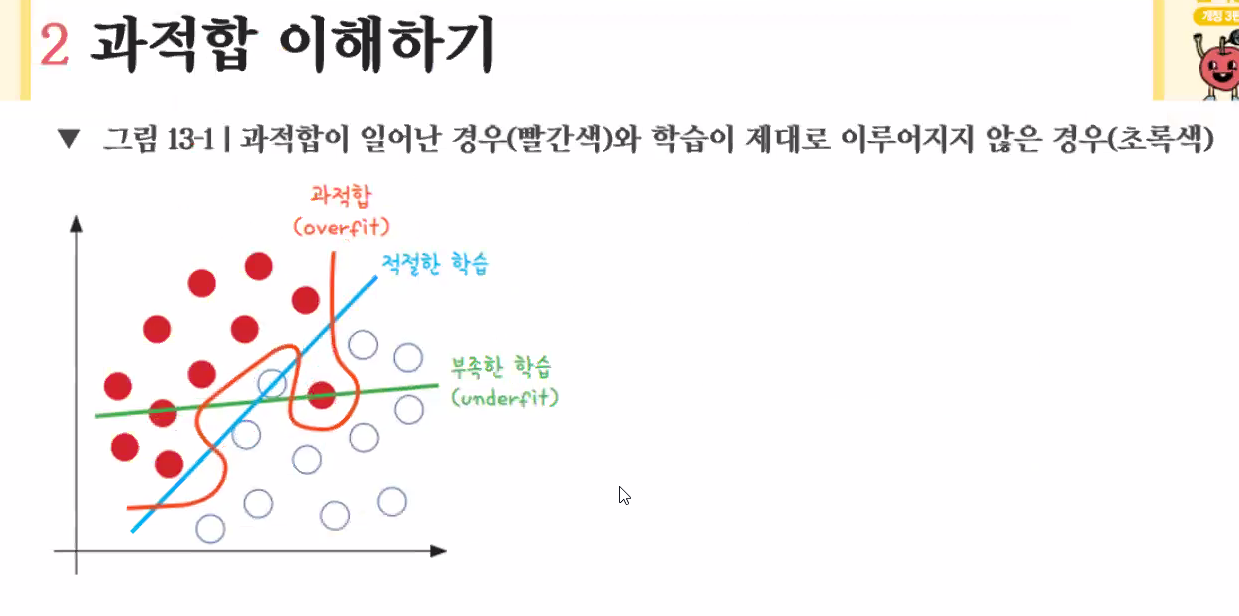

In [157]:
# over fit
# LASSO회귀 
# 편향과 분산의 적절한 것을 찾아야 한다.

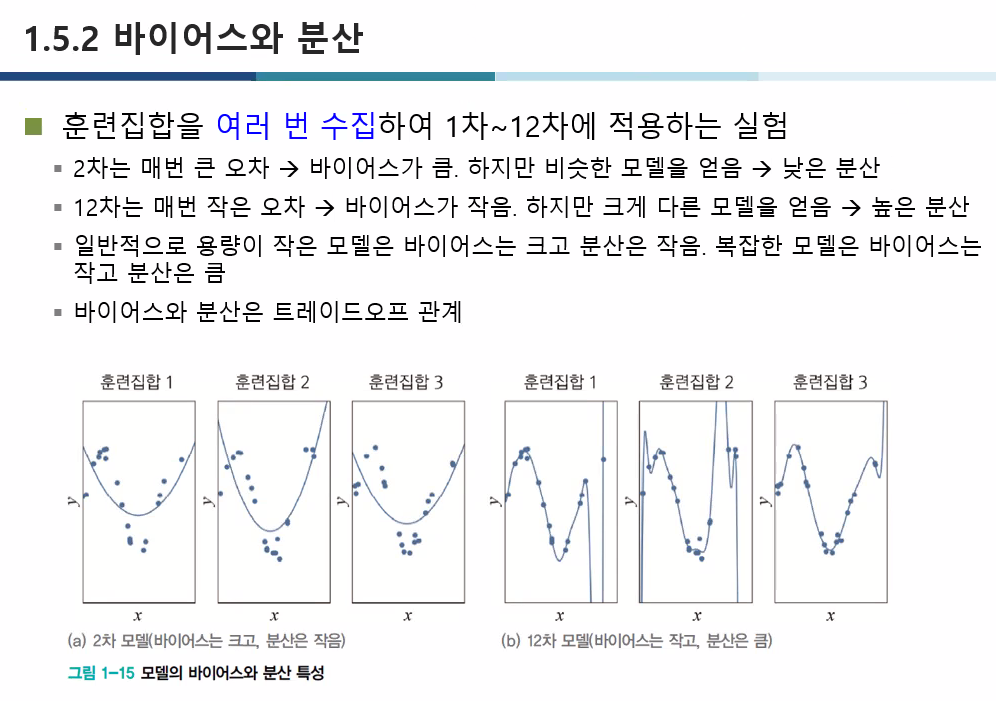

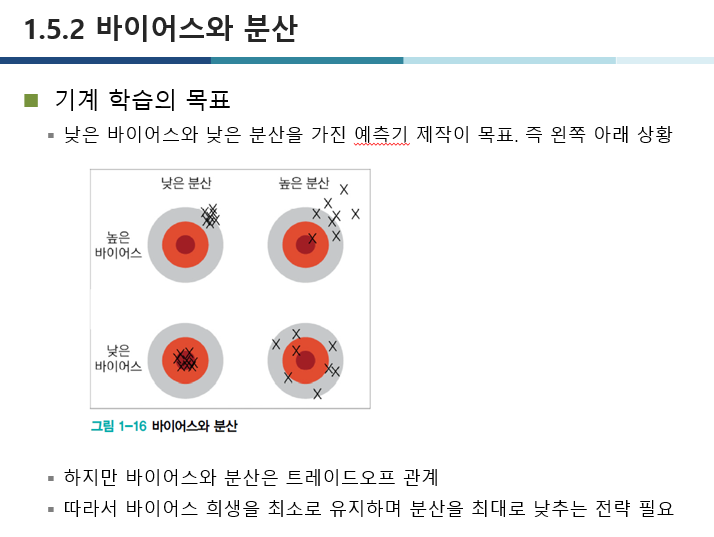

In [ ]:
# trade off : 한쪽을 과하게 하면 기우는 것이기에, 균형을 맞추는 전략